# B2S4 Gráficos para el análisis exploratorio univariado

In [1]:
# Ver el libro 2019_Book_AdvancedGuideToPython3Programming en Springer Books pag 53
import matplotlib.pyplot as plt
import seaborn as sns

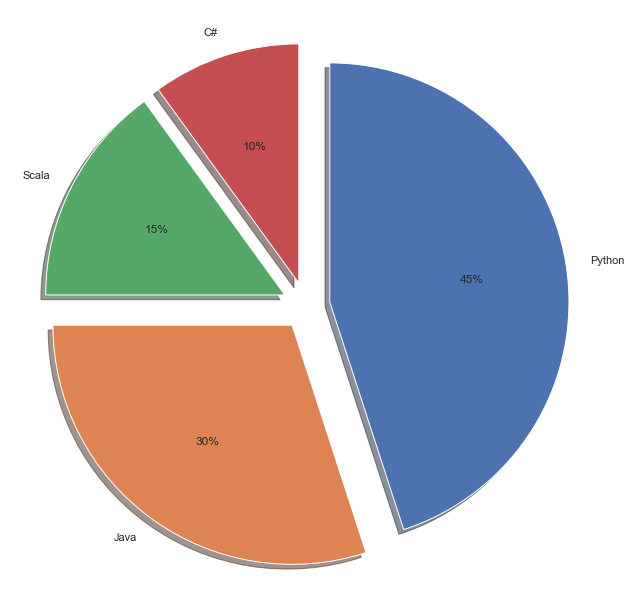

In [25]:
#Gráfico de pastel
import matplotlib.pyplot as plt
labels = ('Python', 'Java', 'Scala', 'C#')
sizes = [45, 30, 15, 10]
# only "explode" the 1st slice (i.e. 'Python')
explode = (0.1, 0.1, 0.1, 0.1)
plt.pie(sizes,
        explode=explode,
        labels=labels,
        autopct='%1.f%%',
        shadow=True,
        counterclock=False,
        startangle=90)
plt.show()

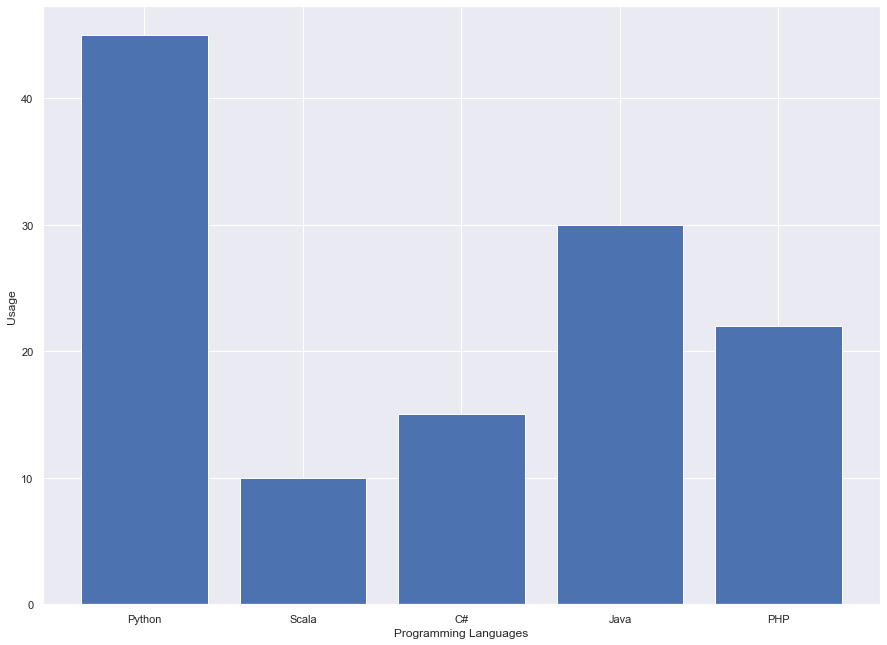

In [26]:
#Gráfico de barras
labels = ('Python', 'Scala', 'C#', 'Java', 'PHP')
index = (1, 2, 3, 4, 5) # provides locations on x axis
sizes = [45, 10, 15, 30, 22]
# Set up the bar chart
plt.bar(index, sizes, tick_label=labels)
# Configure the layout
plt.ylabel('Usage')
plt.xlabel('Programming Languages')
# Display the chart
plt.show()

## Gráficos de caja

In [2]:
#Importamos los datos del bloque 1 del INEGI
import pandas as pd 
dataset = pd.read_csv('C:/Users/jgeis/Documents/Claudia/Cursos/Impartidos/PythonParaCS/Bloque 1 Instalacion y tipos de variables/Tasa_bruta_homicidio.csv',index_col=0)

In [3]:
dataset

,Año,Tasa
Entidad,,
Aguascalientes,1990,0.79
Baja California,1990,3.38
Baja California Sur,1990,0.00
Campeche,1990,2.54
Coahuila de Zaragoza,1990,0.49
...,...,...
Tlaxcala,2019,3.58
Veracruz de Ignacio de la Llave,2019,3.64
Yucatán,2019,0.35


In [6]:
# La variable entidad aparece como índice, hay que resetearlo para que se pueda usar como columna directamente
dataset.reset_index(inplace=True)

## Gráfico de pastel para tasas

In [30]:
# Agrupado de valores el categorías para luego hacer un gráfico de pastel
a=dataset["Tasa"].min();b=dataset["Tasa"].max();
delta=(b-a)/5
#Dividiremos el segmento de la mínima tasa hasta la máxima en 5 partes iguales
bins = [a,a+delta,a+2*delta,a+3*delta,a+4*delta,b]
bins

[0.0, 6.63, 13.26, 19.89, 26.52, 33.15]

In [31]:
names = ["G1", "G2", "G3", "G4", "G5"]

<AxesSubplot:ylabel='Tasa'>

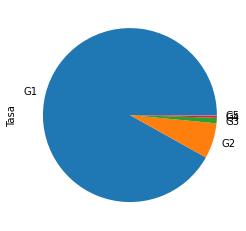

In [32]:
pd.cut(dataset['Tasa'], bins, labels = names).value_counts().plot.pie()

In [33]:
#Ejercicio
#Construir un vector con las edades de sus familiares, por ejemplo:
edades = [43,42,14,9,2,65,72]

# Gráficos de caja

<AxesSubplot:>

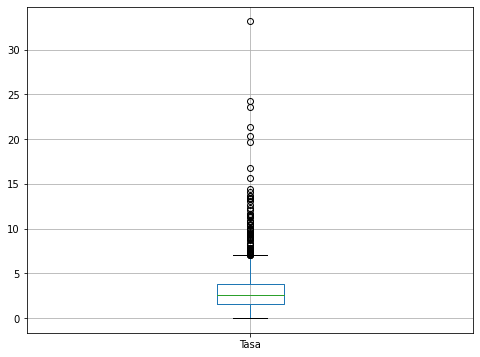

In [34]:
dataset.boxplot(column="Tasa",figsize=(8,6))

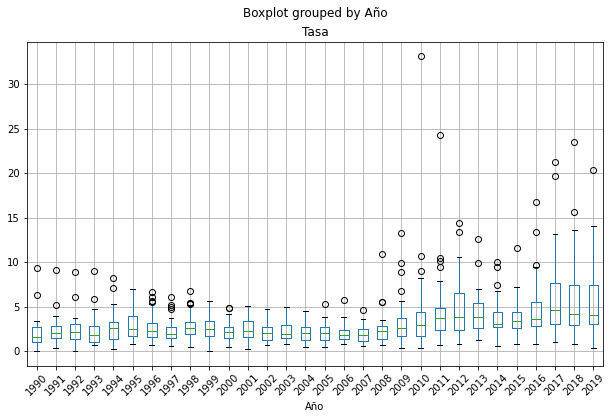

In [35]:
dataset.boxplot(column="Tasa",by="Año",figsize=(10,6))
plt.xticks(rotation=45);  #Rota las etiquetas de x en 45 grados.: x Label rotation  Ver: https://www.kite.com/python/answers/how-to-rotate-axis-labels-in-matplotlib-in-python

# Histogramas

array([[<AxesSubplot:title={'center':'Tasa'}>]], dtype=object)

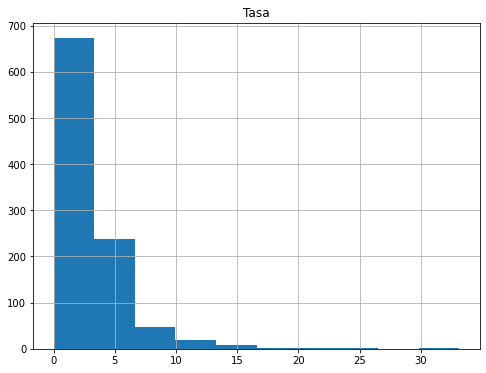

In [36]:
#Histograma
dataset.hist(column="Tasa",figsize=(8,6))

## Gráfico violín

In [37]:
import seaborn as sns

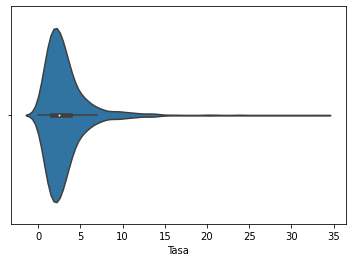

In [38]:
ax = sns.violinplot(x=dataset["Tasa"])

In [40]:
#Tomemos solo los últimos 5 años
dataset2=dataset.loc[dataset['Año']>2014]
dataset2.reset_index();

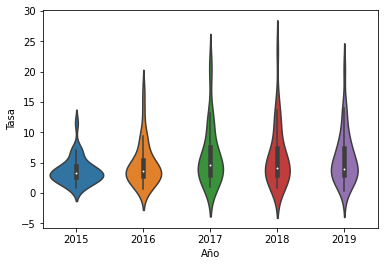

In [41]:
ax = sns.violinplot(x=dataset2['Año'],y=dataset2['Tasa'])

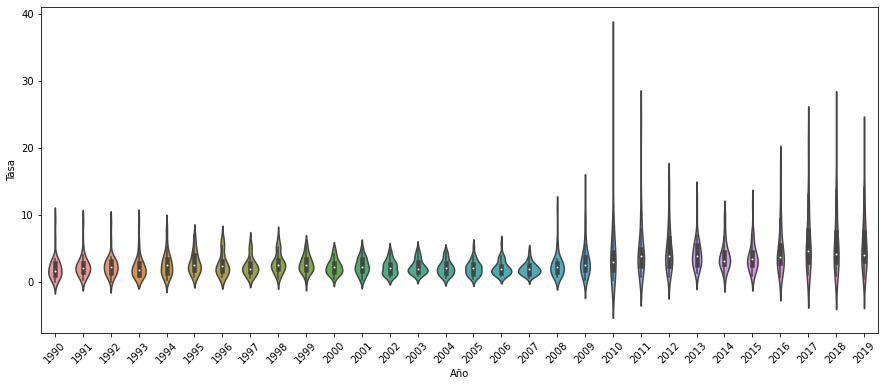

In [42]:
#Gráfico de violín
plt.figure(figsize = (15,6))
ax = sns.violinplot(x=dataset["Año"],y=dataset["Tasa"])
plt.xticks(rotation=45);

## Gráfico de línea

<AxesSubplot:xlabel='Año', ylabel='Tasa'>

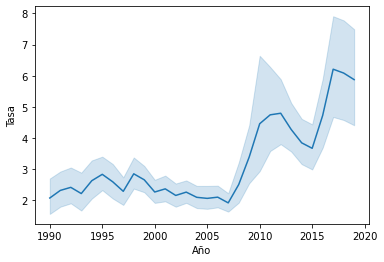

In [43]:
sns.lineplot(data=dataset, x="Año", y="Tasa")
#Passing the entire dataset in long-form mode 
#will aggregate over repeated values (each year) to show the mean and 95% confidence interval:

<AxesSubplot:xlabel='Año', ylabel='Tasa'>

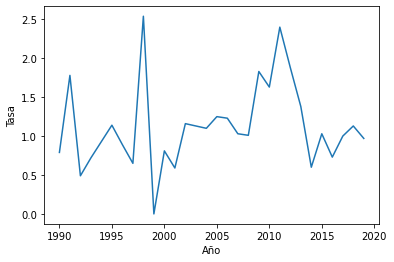

In [44]:
Ags_data = dataset.query("Entidad == 'Aguascalientes'")
sns.lineplot(data=Ags_data, x="Año", y="Tasa")


In [45]:
#Podemos hacer un pivot en la tabla para ver todos los estados
dataset_wide = dataset.pivot("Año", "Entidad", "Tasa")
dataset_wide.head()

Entidad,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
Año,,,,,,,,,,,,,,,,,,,,,
1990,0.79,3.38,0.00,2.54,1.69,1.58,3.25,0.49,0.90,1.14,...,0.40,0.57,3.02,2.15,1.29,1.54,1.25,1.58,0.99,2.84
1991,1.78,2.24,3.03,2.46,3.67,1.63,2.27,0.68,3.97,2.82,...,1.50,1.13,2.18,1.89,2.51,1.94,0.98,1.89,0.28,0.89
1992,0.49,3.44,0.00,2.73,3.19,2.04,2.71,1.33,3.02,1.96,...,3.16,1.21,3.01,2.15,1.34,1.57,1.43,2.02,0.81,1.77
1993,0.72,2.90,1.15,1.66,2.80,1.78,2.45,0.84,2.54,1.80,...,1.99,1.83,2.20,1.10,1.43,1.05,0.93,1.64,0.79,0.73
1994,0.93,2.99,1.11,1.61,3.93,2.76,2.57,1.20,3.31,2.75,...,5.01,1.17,3.09,1.77,2.56,3.03,0.23,1.53,0.52,1.31


In [46]:
sns.set(rc={'figure.figsize':(15,11)})

In [47]:
dataset_wide.columns.values

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México',
       'Coahuila de Zaragoza', 'Colima', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo', 'Morelos',
       'México', 'Nacional', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype=object)

<AxesSubplot:xlabel='Año'>

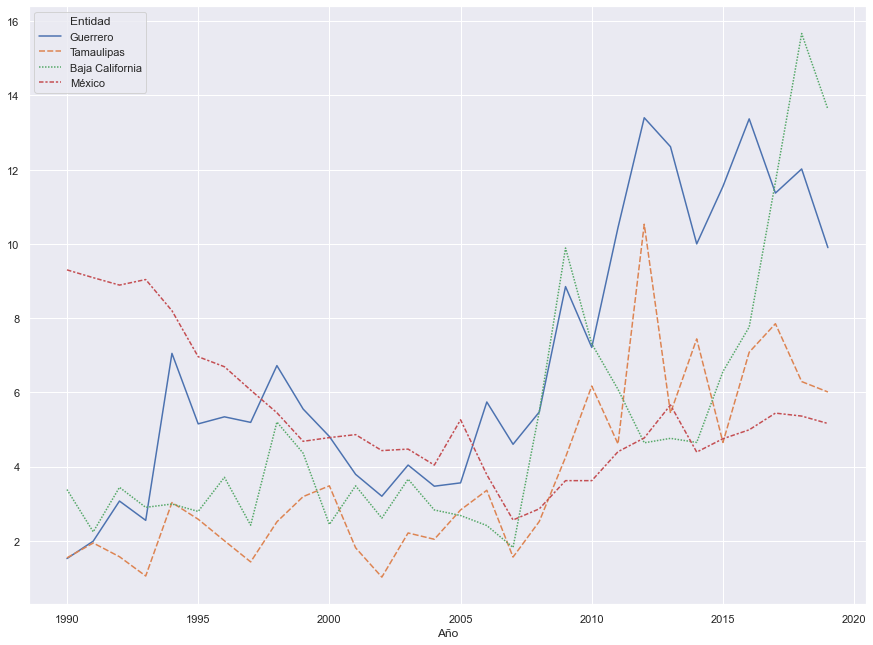

In [48]:
sns.lineplot(data=dataset_wide[['Guerrero','Tamaulipas','Baja California','México']])

Ejercicio: Para un año en particular, hacer un gráfico de barras que muestre las tasas por entidad federativa

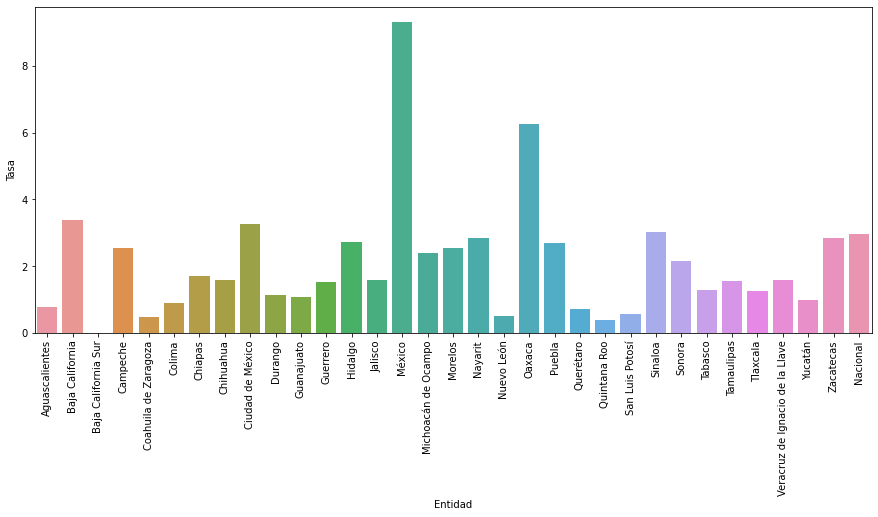

In [10]:
import numpy as np
plt.figure(figsize = (15,6))
sns.barplot(x='Entidad', y='Tasa', data=dataset.loc[dataset['Año']==1990])
plt.xticks(rotation=90);